# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import urllib
import citipy as citipy
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [7]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count
len(cities)

608

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key 

# List of city data
city_data = []

# to print city data
print("Starting Data Retrieval     ")
print("-----------------------------")

# Create counters
no_count = 1
no_set_count = 1

# run loop thru the cities in list
for j, city in enumerate(cities):
        
    # cities group in sets of 200 for logging purposes
    if (j % 200 == 0 and j >= 200):
        no_count += 1
        no_set_count = 0

    #  endpoint created with each city
    city_url = url + "&q=" + city
    
    # print the endpoint, , counts and set numbers
    print("Processing Record %s of Set %s | %s" % (no_count, no_set_count, city))

    # Add 1 to the no count
    no_count += 1

    # Run an API request
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        cities_lat = city_weather["coord"]["lat"]
        cities_lng = city_weather["coord"]["lon"]
        cities_max_temp = city_weather["main"]["temp_max"]
        cities_humidity = city_weather["main"]["humidity"]
        cities_clouds = city_weather["clouds"]["all"]
        cities_wind = city_weather["wind"]["speed"]
        cities_country = city_weather["sys"]["country"]
        cities_date = city_weather["dt"]

        #  City information append into city_data list
        city_data.append({"City": city, 
                          "Lat": cities_lat, 
                          "Lng": cities_lng, 
                          "Max Temp": cities_max_temp,
                          "Humidity": cities_humidity,
                          "Cloudiness": cities_clouds,
                          "Wind Speed": cities_wind,
                          "Country": cities_country,
                          "Date": cities_date})

    except:
        print("City not found. Skipping...")
        pass
              
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")     
   
        
        

Starting Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | omboue
Processing Record 2 of Set 1 | puerto ayora
Processing Record 3 of Set 1 | morgantown
Processing Record 4 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 5 of Set 1 | stephenville
Processing Record 6 of Set 1 | clyde river
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | new norfolk
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | begoro
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | constitucion
Processing Record 14 of Set 1 | pevek
Processing Record 15 of Set 1 | clovis
Processing Record 16 of Set 1 | castro
Processing Record 17 of Set 1 | georgetown
Processing Record 18 of Set 1 | saint-joseph
Processing Record 19 of Set 1 | kapaa
Processing Record 20 of Set 1 | dhidhdhoo
Processing Record 21 of Set 1 | nikolskoye
Processing Record 22 of Set 1 | palabuhanratu

Processing Record 191 of Set 1 | harper
Processing Record 192 of Set 1 | olafsvik
Processing Record 193 of Set 1 | santa maria del oro
Processing Record 194 of Set 1 | prince rupert
Processing Record 195 of Set 1 | south venice
Processing Record 196 of Set 1 | kamina
Processing Record 197 of Set 1 | orje
Processing Record 198 of Set 1 | berbera
Processing Record 199 of Set 1 | goundam
Processing Record 200 of Set 1 | bengkalis
City not found. Skipping...
Processing Record 202 of Set 0 | shangzhi
Processing Record 203 of Set 0 | kralendijk
Processing Record 204 of Set 0 | bousso
Processing Record 205 of Set 0 | kaitangata
Processing Record 206 of Set 0 | touros
Processing Record 207 of Set 0 | yulara
Processing Record 208 of Set 0 | byron bay
Processing Record 209 of Set 0 | saleaula
City not found. Skipping...
Processing Record 210 of Set 0 | beatrice
Processing Record 211 of Set 0 | faxinal
Processing Record 212 of Set 0 | belaya gora
Processing Record 213 of Set 0 | saskylakh
Process

Processing Record 379 of Set 0 | grand river south east
City not found. Skipping...
Processing Record 380 of Set 0 | kahului
Processing Record 381 of Set 0 | airai
Processing Record 382 of Set 0 | shestakovo
Processing Record 383 of Set 0 | namatanai
Processing Record 384 of Set 0 | piacabucu
Processing Record 385 of Set 0 | princeton
Processing Record 386 of Set 0 | norman wells
Processing Record 387 of Set 0 | nabire
Processing Record 388 of Set 0 | middleton
Processing Record 389 of Set 0 | hearst
Processing Record 390 of Set 0 | guadalupe y calvo
Processing Record 391 of Set 0 | itoman
Processing Record 392 of Set 0 | moose factory
Processing Record 393 of Set 0 | pithora
Processing Record 394 of Set 0 | seryshevo
Processing Record 395 of Set 0 | khatanga
Processing Record 396 of Set 0 | mackay
Processing Record 397 of Set 0 | tessalit
Processing Record 398 of Set 0 | shangrao
Processing Record 399 of Set 0 | zile
Processing Record 400 of Set 0 | fereydun kenar
Processing Record 40

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
city_weather

{'coord': {'lon': 12.62, 'lat': 41.49},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 48.78,
  'feels_like': 46.36,
  'temp_min': 44.01,
  'temp_max': 53.6,
  'pressure': 1026,
  'humidity': 87},
 'visibility': 10000,
 'wind': {'speed': 2.24, 'deg': 70},
 'clouds': {'all': 5},
 'dt': 1581967307,
 'sys': {'type': 1,
  'id': 6794,
  'country': 'IT',
  'sunrise': 1581919388,
  'sunset': 1581957858},
 'timezone': 3600,
 'id': 6542092,
 'name': 'Anzio',
 'cod': 200}

In [ ]:
city_data_df = pd.DataFrame(city_data)
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


In [ ]:
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [ ]:
city_data_df.count()

In [ ]:
city_data_df.head()

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

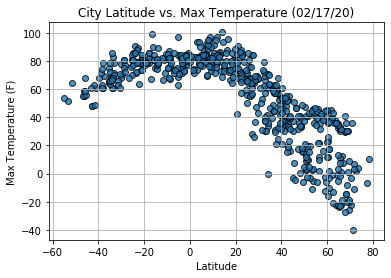

In [15]:
plt.scatter(lats, 
            max_temps,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()

#### Latitude vs. Humidity Plot

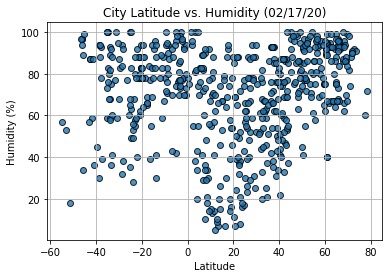

In [16]:
plt.scatter(lats, humidity, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()

#### Latitude vs. Cloudiness Plot

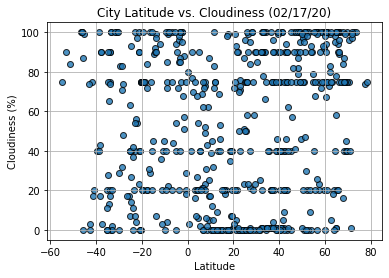

In [17]:
plt.scatter(lats, cloudiness, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()

#### Latitude vs. Wind Speed Plot

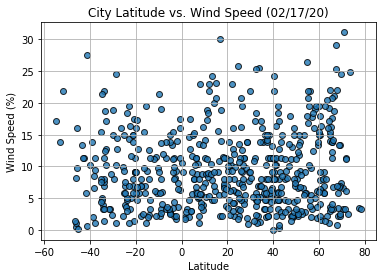

In [18]:
plt.scatter(lats, wind_speed, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()

## Linear Regression

In [19]:
# OPTIONAL: Create a function to create Linear Regression plots
def plot_linear_regression(x_axis, y_axis, title, text_coordinates):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    regress_values = x_axis * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x_axis,y_axis)
    plt.plot(x_axis,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [20]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemisphere = city_data_df.loc[(city_data_df["Lat"] < 0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.857594724774379


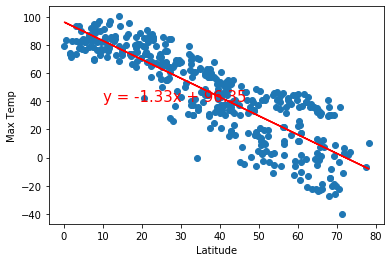

In [21]:
x_axis = northern_hemisphere["Lat"]
y_axis = northern_hemisphere["Max Temp"]
plot_linear_regression(x_axis, y_axis, 'Max Temp',(10,40))
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6263349402200425


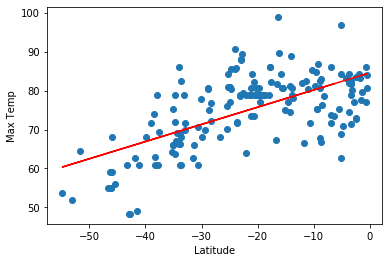

In [22]:
x_axis = southern_hemisphere["Lat"]
y_axis = southern_hemisphere["Max Temp"]
plot_linear_regression(x_axis, y_axis, 'Max Temp', (-30,35))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.4572217543714216


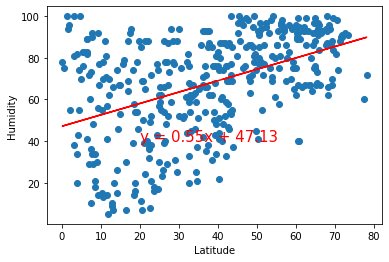

In [23]:
x_axis = northern_hemisphere["Lat"]
y_axis = northern_hemisphere["Humidity"]
plot_linear_regression(x_axis, y_axis, 'Humidity',(20,40))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.19242661756381618


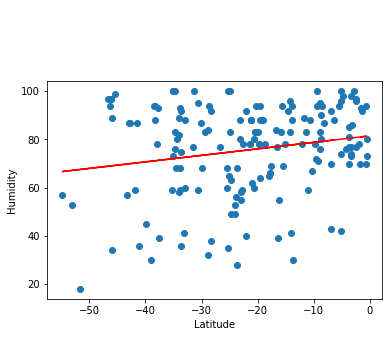

In [36]:
x_axis = southern_hemisphere["Lat"]
y_axis = southern_hemisphere["Humidity"]
plot_linear_regression(x_axis, y_axis, 'Humidity', (-40,130))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.35919022004226986


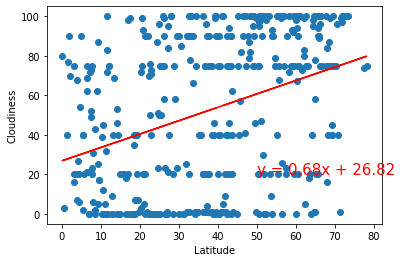

In [25]:
x_axis = northern_hemisphere["Lat"]
y_axis = northern_hemisphere["Cloudiness"]
plot_linear_regression(x_axis, y_axis, 'Cloudiness', (50,20))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.09014384618840485


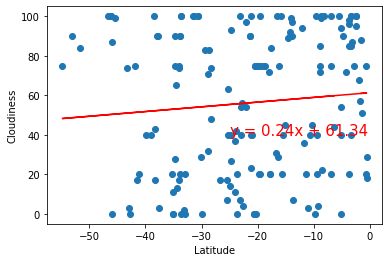

In [26]:
x_axis = southern_hemisphere["Lat"]
y_axis = southern_hemisphere["Cloudiness"]
plot_linear_regression(x_axis, y_axis, 'Cloudiness', (-25,40))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.07397918936775595


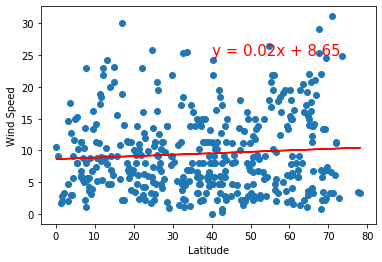

In [31]:
x_axis = northern_hemisphere["Lat"]
y_axis = northern_hemisphere["Wind Speed"]
plot_linear_regression(x_axis, y_axis, 'Wind Speed', (40,25))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.0966227681370215


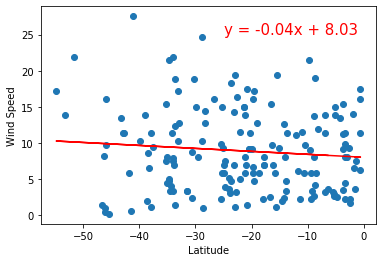

In [28]:
x_axis = southern_hemisphere["Lat"]
y_axis = southern_hemisphere["Wind Speed"]
plot_linear_regression(x_axis, y_axis, 'Wind Speed', (-25,25))

In [ ]:
#from the first scatter plot, it was oberserved there was a sudden rise of temperature when the latitude was at -22 degree and it kept rising till the latitude was at 0 and the temperature start fall.
#this shows that there is a strong correlation between latitude and temperature. the lower the latitude the higher the temperature